In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
import tensorflow
print (tensorflow.__version__)

2.3.1


Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


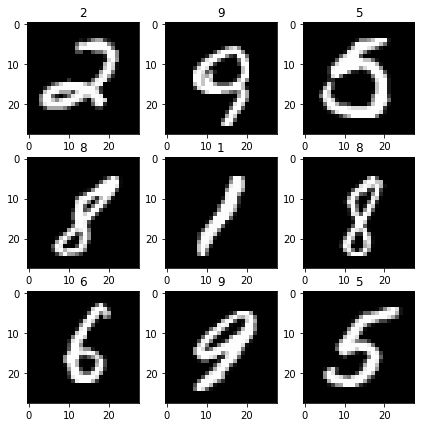

In [3]:
from tensorflow.keras.datasets import fashion_mnist, mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))

plt.figure(figsize=(7, 7))
for j in range(9):
    i = np.random.randint(0, 10000)
    plt.subplot(330 + 1 + j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainY[i])
plt.show()

In [4]:
trainX = [image/255.0 for image in trainX]
testX = [image/255.0 for image in testX]

trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = np.reshape(testX, (10000, 28, 28, 1))

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


# Generator Model

In [5]:
random_input = tensorflow.keras.layers.Input(shape = 50)

x = tensorflow.keras.layers.Dense(512)(random_input)
x = tensorflow.keras.layers.Dense(28*28)(x)
x = tensorflow.keras.layers.Reshape((28, 28, 1))(x)

generated_image = tensorflow.keras.layers.Activation('sigmoid')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 512)               26112     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               402192    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
activation (Activation)      (None, 28, 28, 1)         0         
Total params: 428,304
Trainable params: 428,304
Non-trainable params: 0
_________________________________________________________________


# Discriminator

In [6]:
image_input = tensorflow.keras.layers.Input(shape=(28, 28, 1))

x = tensorflow.keras.layers.Flatten()(image_input)
x = tensorflow.keras.layers.Dense(128)(x)
x = tensorflow.keras.layers.Dense(1)(x)

real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [7]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# GAN

In [8]:
discriminator_network.trainable=False

gan_input = generator_network(random_input)
gan_output = discriminator_network(gan_input)

gan_model = tensorflow.keras.models.Model(random_input, gan_output)
gan_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
functional_1 (Functional)    (None, 28, 28, 1)         428304    
_________________________________________________________________
functional_3 (Functional)    (None, 1)                 100609    
Total params: 528,913
Trainable params: 428,304
Non-trainable params: 100,609
_________________________________________________________________


# Compiling Models

In [9]:
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [10]:
# Indices of Zero Images
indices = list(np.where(trainY==0)[0])

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    fake_samples = get_fake_samples(generator_network, 10, noise_size)

    plt.figure(figsize=(7, 7))
    for j in range(9):
        i = j
        plt.subplot(330 + 1 + j)
        plt.imshow(fake_samples[i,:,:,-1], cmap='gray')
    plt.show()
    return

# Training GAN

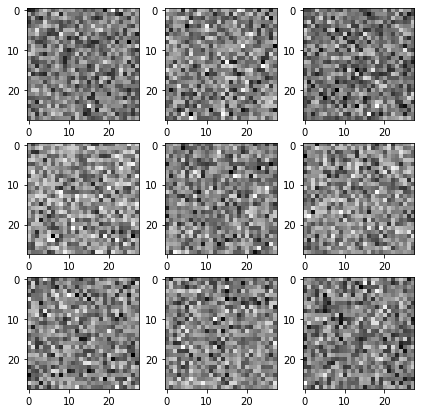

Epoch:0, Step:0, D-Loss:0.530, D-Acc:90.000, G-Loss:1.175
Epoch:0, Step:50, D-Loss:0.016, D-Acc:100.000, G-Loss:4.707
Epoch:0, Step:100, D-Loss:0.013, D-Acc:100.000, G-Loss:6.041
Epoch:0, Step:150, D-Loss:0.005, D-Acc:100.000, G-Loss:7.339
Epoch:0, Step:200, D-Loss:0.016, D-Acc:100.000, G-Loss:7.836
Epoch:0, Step:250, D-Loss:0.016, D-Acc:100.000, G-Loss:8.789
Epoch:0, Step:300, D-Loss:0.027, D-Acc:99.000, G-Loss:6.173
Epoch:0, Step:350, D-Loss:0.020, D-Acc:100.000, G-Loss:4.926
Epoch:0, Step:400, D-Loss:0.039, D-Acc:99.000, G-Loss:3.914
Epoch:0, Step:450, D-Loss:0.050, D-Acc:99.000, G-Loss:3.714


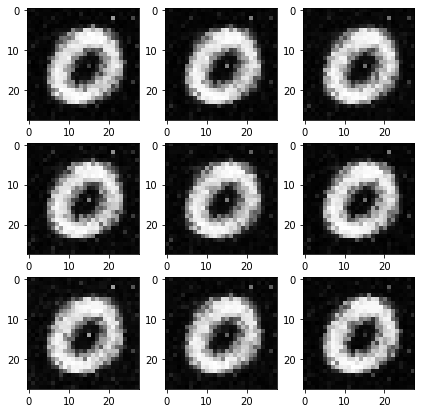

Epoch:1, Step:0, D-Loss:0.079, D-Acc:100.000, G-Loss:2.925
Epoch:1, Step:50, D-Loss:0.121, D-Acc:100.000, G-Loss:2.640
Epoch:1, Step:100, D-Loss:0.203, D-Acc:99.000, G-Loss:1.978
Epoch:1, Step:150, D-Loss:0.244, D-Acc:99.000, G-Loss:1.956
Epoch:1, Step:200, D-Loss:0.268, D-Acc:98.000, G-Loss:1.798
Epoch:1, Step:250, D-Loss:0.299, D-Acc:95.000, G-Loss:1.564
Epoch:1, Step:300, D-Loss:0.352, D-Acc:95.000, G-Loss:1.529
Epoch:1, Step:350, D-Loss:0.343, D-Acc:95.000, G-Loss:1.550
Epoch:1, Step:400, D-Loss:0.351, D-Acc:97.000, G-Loss:1.526
Epoch:1, Step:450, D-Loss:0.376, D-Acc:93.000, G-Loss:1.517


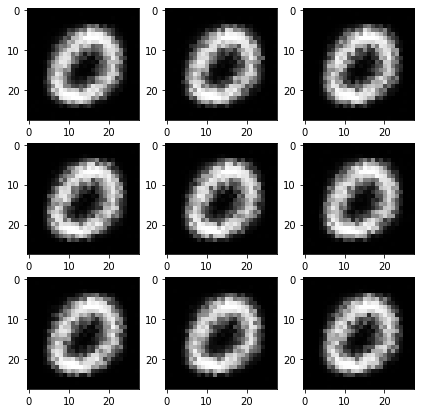

Epoch:2, Step:0, D-Loss:0.407, D-Acc:87.000, G-Loss:1.240
Epoch:2, Step:50, D-Loss:0.460, D-Acc:90.000, G-Loss:1.132
Epoch:2, Step:100, D-Loss:0.474, D-Acc:85.000, G-Loss:1.115
Epoch:2, Step:150, D-Loss:0.446, D-Acc:85.000, G-Loss:1.321
Epoch:2, Step:200, D-Loss:0.396, D-Acc:94.000, G-Loss:1.325
Epoch:2, Step:250, D-Loss:0.498, D-Acc:84.000, G-Loss:0.975
Epoch:2, Step:300, D-Loss:0.566, D-Acc:85.000, G-Loss:0.953
Epoch:2, Step:350, D-Loss:0.520, D-Acc:86.000, G-Loss:1.009
Epoch:2, Step:400, D-Loss:0.486, D-Acc:91.000, G-Loss:1.172
Epoch:2, Step:450, D-Loss:0.472, D-Acc:84.000, G-Loss:1.084


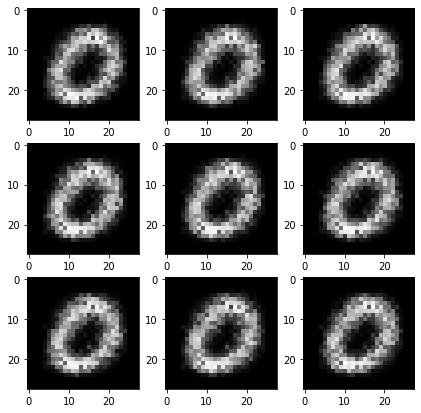

Epoch:3, Step:0, D-Loss:0.511, D-Acc:86.000, G-Loss:1.118
Epoch:3, Step:50, D-Loss:0.604, D-Acc:71.000, G-Loss:0.879
Epoch:3, Step:100, D-Loss:0.569, D-Acc:79.000, G-Loss:0.922
Epoch:3, Step:150, D-Loss:0.555, D-Acc:82.000, G-Loss:0.999
Epoch:3, Step:200, D-Loss:0.565, D-Acc:69.000, G-Loss:0.898
Epoch:3, Step:250, D-Loss:0.673, D-Acc:59.000, G-Loss:0.747
Epoch:3, Step:300, D-Loss:0.903, D-Acc:23.000, G-Loss:0.554
Epoch:3, Step:350, D-Loss:0.880, D-Acc:22.000, G-Loss:0.537
Epoch:3, Step:400, D-Loss:0.763, D-Acc:29.000, G-Loss:0.648
Epoch:3, Step:450, D-Loss:0.732, D-Acc:33.000, G-Loss:0.640


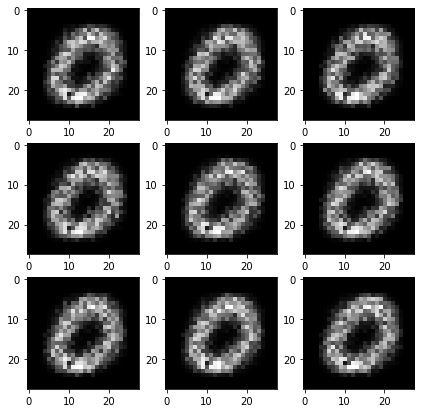

Epoch:4, Step:0, D-Loss:0.719, D-Acc:46.000, G-Loss:0.686
Epoch:4, Step:50, D-Loss:0.716, D-Acc:31.000, G-Loss:0.601
Epoch:4, Step:100, D-Loss:0.770, D-Acc:32.000, G-Loss:0.592
Epoch:4, Step:150, D-Loss:0.855, D-Acc:28.000, G-Loss:0.492
Epoch:4, Step:200, D-Loss:0.784, D-Acc:28.000, G-Loss:0.557
Epoch:4, Step:250, D-Loss:0.725, D-Acc:33.000, G-Loss:0.588
Epoch:4, Step:300, D-Loss:0.773, D-Acc:35.000, G-Loss:0.548
Epoch:4, Step:350, D-Loss:0.789, D-Acc:28.000, G-Loss:0.535
Epoch:4, Step:400, D-Loss:0.742, D-Acc:32.000, G-Loss:0.567
Epoch:4, Step:450, D-Loss:0.810, D-Acc:26.000, G-Loss:0.497


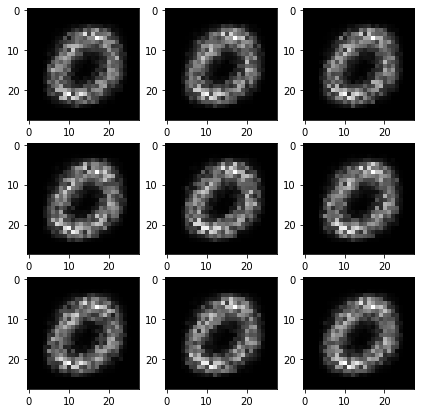

Epoch:5, Step:0, D-Loss:0.761, D-Acc:35.000, G-Loss:0.513
Epoch:5, Step:50, D-Loss:0.740, D-Acc:34.000, G-Loss:0.570
Epoch:5, Step:100, D-Loss:0.715, D-Acc:38.000, G-Loss:0.571
Epoch:5, Step:150, D-Loss:0.654, D-Acc:42.000, G-Loss:0.609
Epoch:5, Step:200, D-Loss:0.661, D-Acc:49.000, G-Loss:0.645
Epoch:5, Step:250, D-Loss:0.678, D-Acc:41.000, G-Loss:0.618
Epoch:5, Step:300, D-Loss:0.687, D-Acc:43.000, G-Loss:0.643
Epoch:5, Step:350, D-Loss:0.671, D-Acc:46.000, G-Loss:0.680
Epoch:5, Step:400, D-Loss:0.628, D-Acc:55.000, G-Loss:0.681
Epoch:5, Step:450, D-Loss:0.645, D-Acc:57.000, G-Loss:0.697


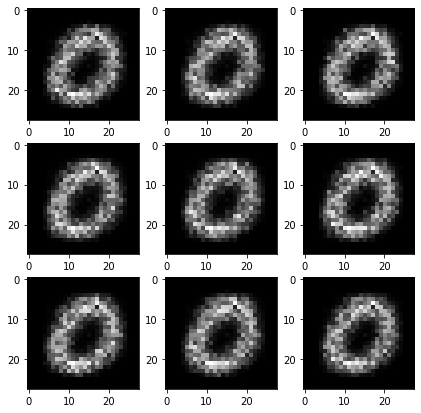

Epoch:6, Step:0, D-Loss:0.649, D-Acc:50.000, G-Loss:0.707
Epoch:6, Step:50, D-Loss:0.688, D-Acc:62.000, G-Loss:0.726
Epoch:6, Step:100, D-Loss:0.627, D-Acc:64.000, G-Loss:0.748
Epoch:6, Step:150, D-Loss:0.676, D-Acc:68.000, G-Loss:0.752
Epoch:6, Step:200, D-Loss:0.711, D-Acc:52.000, G-Loss:0.710
Epoch:6, Step:250, D-Loss:0.638, D-Acc:68.000, G-Loss:0.736
Epoch:6, Step:300, D-Loss:0.618, D-Acc:77.000, G-Loss:0.798
Epoch:6, Step:350, D-Loss:0.600, D-Acc:79.000, G-Loss:0.795
Epoch:6, Step:400, D-Loss:0.654, D-Acc:68.000, G-Loss:0.746
Epoch:6, Step:450, D-Loss:0.629, D-Acc:74.000, G-Loss:0.777


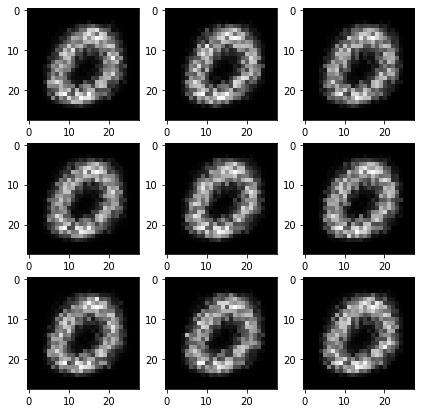

Epoch:7, Step:0, D-Loss:0.645, D-Acc:74.000, G-Loss:0.767
Epoch:7, Step:50, D-Loss:0.628, D-Acc:74.000, G-Loss:0.760
Epoch:7, Step:100, D-Loss:0.646, D-Acc:75.000, G-Loss:0.785
Epoch:7, Step:150, D-Loss:0.682, D-Acc:61.000, G-Loss:0.734
Epoch:7, Step:200, D-Loss:0.717, D-Acc:51.000, G-Loss:0.754
Epoch:7, Step:250, D-Loss:0.756, D-Acc:38.000, G-Loss:0.689
Epoch:7, Step:300, D-Loss:0.694, D-Acc:54.000, G-Loss:0.723
Epoch:7, Step:350, D-Loss:0.722, D-Acc:59.000, G-Loss:0.766
Epoch:7, Step:400, D-Loss:0.669, D-Acc:62.000, G-Loss:0.753
Epoch:7, Step:450, D-Loss:0.687, D-Acc:41.000, G-Loss:0.738


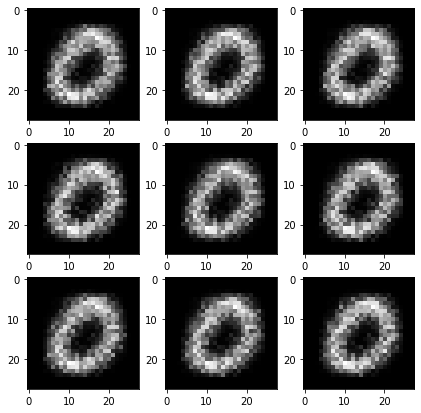

Epoch:8, Step:0, D-Loss:0.752, D-Acc:45.000, G-Loss:0.701
Epoch:8, Step:50, D-Loss:0.729, D-Acc:53.000, G-Loss:0.730
Epoch:8, Step:100, D-Loss:0.668, D-Acc:74.000, G-Loss:0.775
Epoch:8, Step:150, D-Loss:0.709, D-Acc:70.000, G-Loss:0.794
Epoch:8, Step:200, D-Loss:0.669, D-Acc:65.000, G-Loss:0.819
Epoch:8, Step:250, D-Loss:0.737, D-Acc:65.000, G-Loss:0.777
Epoch:8, Step:300, D-Loss:0.711, D-Acc:66.000, G-Loss:0.781
Epoch:8, Step:350, D-Loss:0.793, D-Acc:48.000, G-Loss:0.722
Epoch:8, Step:400, D-Loss:0.713, D-Acc:57.000, G-Loss:0.749
Epoch:8, Step:450, D-Loss:0.740, D-Acc:56.000, G-Loss:0.773


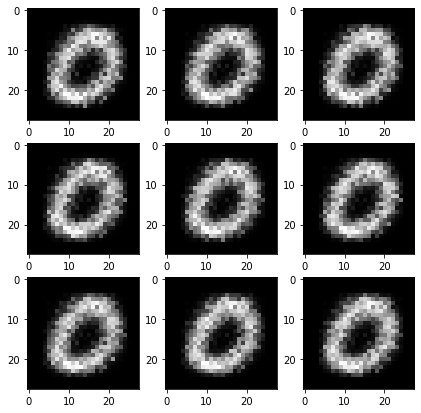

Epoch:9, Step:0, D-Loss:0.743, D-Acc:40.000, G-Loss:0.733
Epoch:9, Step:50, D-Loss:0.722, D-Acc:61.000, G-Loss:0.777
Epoch:9, Step:100, D-Loss:0.704, D-Acc:69.000, G-Loss:0.828
Epoch:9, Step:150, D-Loss:0.646, D-Acc:76.000, G-Loss:0.842
Epoch:9, Step:200, D-Loss:0.758, D-Acc:52.000, G-Loss:0.719
Epoch:9, Step:250, D-Loss:0.725, D-Acc:61.000, G-Loss:0.765
Epoch:9, Step:300, D-Loss:0.693, D-Acc:58.000, G-Loss:0.799
Epoch:9, Step:350, D-Loss:0.719, D-Acc:65.000, G-Loss:0.769
Epoch:9, Step:400, D-Loss:0.694, D-Acc:61.000, G-Loss:0.804
Epoch:9, Step:450, D-Loss:0.717, D-Acc:68.000, G-Loss:0.831


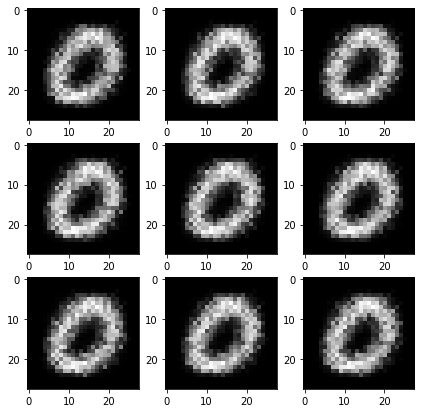

Epoch:10, Step:0, D-Loss:0.678, D-Acc:67.000, G-Loss:0.792
Epoch:10, Step:50, D-Loss:0.717, D-Acc:57.000, G-Loss:0.752
Epoch:10, Step:100, D-Loss:0.688, D-Acc:67.000, G-Loss:0.725
Epoch:10, Step:150, D-Loss:0.694, D-Acc:66.000, G-Loss:0.784
Epoch:10, Step:200, D-Loss:0.671, D-Acc:64.000, G-Loss:0.835
Epoch:10, Step:250, D-Loss:0.691, D-Acc:74.000, G-Loss:0.829
Epoch:10, Step:300, D-Loss:0.661, D-Acc:67.000, G-Loss:0.798
Epoch:10, Step:350, D-Loss:0.689, D-Acc:62.000, G-Loss:0.804
Epoch:10, Step:400, D-Loss:0.680, D-Acc:70.000, G-Loss:0.777
Epoch:10, Step:450, D-Loss:0.660, D-Acc:68.000, G-Loss:0.802


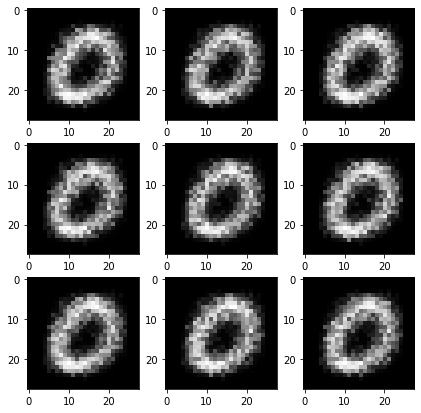

Epoch:11, Step:0, D-Loss:0.695, D-Acc:56.000, G-Loss:0.753
Epoch:11, Step:50, D-Loss:0.699, D-Acc:58.000, G-Loss:0.740
Epoch:11, Step:100, D-Loss:0.695, D-Acc:54.000, G-Loss:0.755
Epoch:11, Step:150, D-Loss:0.676, D-Acc:60.000, G-Loss:0.774
Epoch:11, Step:200, D-Loss:0.717, D-Acc:49.000, G-Loss:0.715
Epoch:11, Step:250, D-Loss:0.691, D-Acc:52.000, G-Loss:0.744
Epoch:11, Step:300, D-Loss:0.757, D-Acc:27.000, G-Loss:0.657
Epoch:11, Step:350, D-Loss:0.684, D-Acc:47.000, G-Loss:0.759
Epoch:11, Step:400, D-Loss:0.716, D-Acc:60.000, G-Loss:0.727
Epoch:11, Step:450, D-Loss:0.708, D-Acc:35.000, G-Loss:0.685


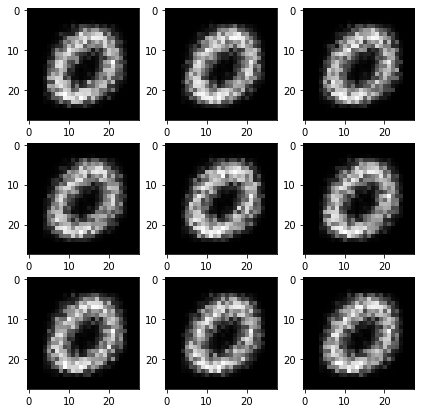

Epoch:12, Step:0, D-Loss:0.696, D-Acc:49.000, G-Loss:0.732
Epoch:12, Step:50, D-Loss:0.707, D-Acc:40.000, G-Loss:0.698
Epoch:12, Step:100, D-Loss:0.706, D-Acc:36.000, G-Loss:0.685
Epoch:12, Step:150, D-Loss:0.719, D-Acc:29.000, G-Loss:0.685
Epoch:12, Step:200, D-Loss:0.701, D-Acc:35.000, G-Loss:0.693
Epoch:12, Step:250, D-Loss:0.717, D-Acc:38.000, G-Loss:0.696
Epoch:12, Step:300, D-Loss:0.665, D-Acc:62.000, G-Loss:0.734
Epoch:12, Step:350, D-Loss:0.674, D-Acc:37.000, G-Loss:0.696
Epoch:12, Step:400, D-Loss:0.764, D-Acc:26.000, G-Loss:0.651
Epoch:12, Step:450, D-Loss:0.706, D-Acc:38.000, G-Loss:0.688


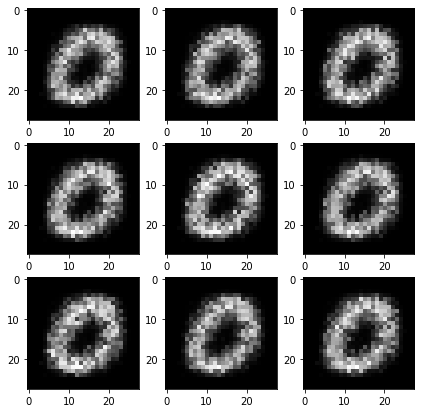

Epoch:13, Step:0, D-Loss:0.670, D-Acc:47.000, G-Loss:0.725
Epoch:13, Step:50, D-Loss:0.735, D-Acc:34.000, G-Loss:0.686
Epoch:13, Step:100, D-Loss:0.697, D-Acc:42.000, G-Loss:0.699
Epoch:13, Step:150, D-Loss:0.656, D-Acc:69.000, G-Loss:0.752
Epoch:13, Step:200, D-Loss:0.665, D-Acc:52.000, G-Loss:0.719
Epoch:13, Step:250, D-Loss:0.721, D-Acc:31.000, G-Loss:0.687
Epoch:13, Step:300, D-Loss:0.683, D-Acc:49.000, G-Loss:0.697
Epoch:13, Step:350, D-Loss:0.674, D-Acc:56.000, G-Loss:0.711
Epoch:13, Step:400, D-Loss:0.722, D-Acc:45.000, G-Loss:0.724
Epoch:13, Step:450, D-Loss:0.696, D-Acc:50.000, G-Loss:0.714


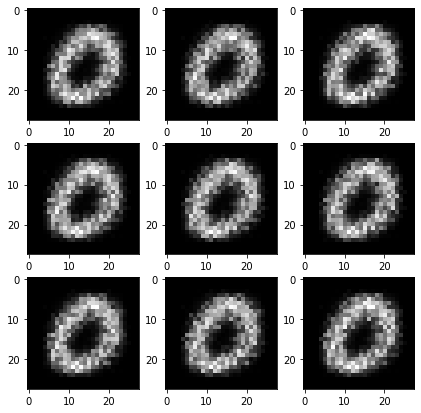

Epoch:14, Step:0, D-Loss:0.706, D-Acc:54.000, G-Loss:0.719
Epoch:14, Step:50, D-Loss:0.698, D-Acc:55.000, G-Loss:0.729
Epoch:14, Step:100, D-Loss:0.687, D-Acc:56.000, G-Loss:0.726
Epoch:14, Step:150, D-Loss:0.695, D-Acc:43.000, G-Loss:0.728
Epoch:14, Step:200, D-Loss:0.689, D-Acc:47.000, G-Loss:0.696
Epoch:14, Step:250, D-Loss:0.699, D-Acc:51.000, G-Loss:0.739
Epoch:14, Step:300, D-Loss:0.705, D-Acc:68.000, G-Loss:0.806
Epoch:14, Step:350, D-Loss:0.687, D-Acc:60.000, G-Loss:0.753
Epoch:14, Step:400, D-Loss:0.703, D-Acc:55.000, G-Loss:0.726
Epoch:14, Step:450, D-Loss:0.693, D-Acc:67.000, G-Loss:0.768


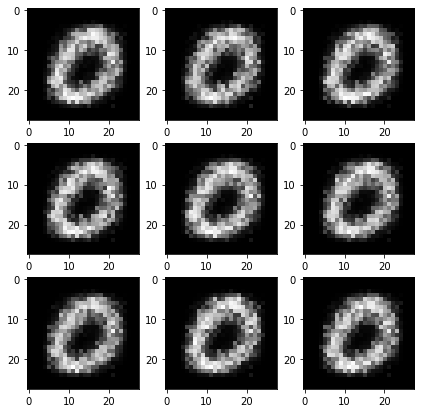

Epoch:15, Step:0, D-Loss:0.700, D-Acc:56.000, G-Loss:0.751
Epoch:15, Step:50, D-Loss:0.729, D-Acc:45.000, G-Loss:0.750
Epoch:15, Step:100, D-Loss:0.670, D-Acc:55.000, G-Loss:0.778
Epoch:15, Step:150, D-Loss:0.682, D-Acc:65.000, G-Loss:0.763
Epoch:15, Step:200, D-Loss:0.680, D-Acc:61.000, G-Loss:0.723
Epoch:15, Step:250, D-Loss:0.710, D-Acc:51.000, G-Loss:0.725
Epoch:15, Step:300, D-Loss:0.730, D-Acc:54.000, G-Loss:0.763
Epoch:15, Step:350, D-Loss:0.699, D-Acc:50.000, G-Loss:0.716
Epoch:15, Step:400, D-Loss:0.656, D-Acc:78.000, G-Loss:0.798
Epoch:15, Step:450, D-Loss:0.691, D-Acc:62.000, G-Loss:0.756


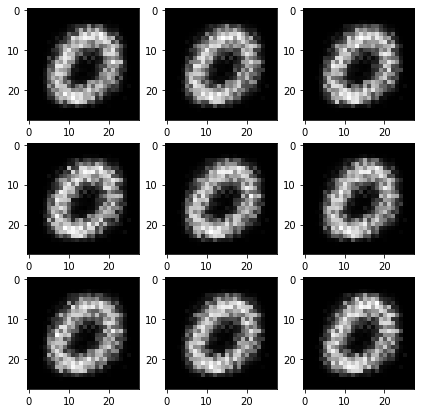

Epoch:16, Step:0, D-Loss:0.727, D-Acc:36.000, G-Loss:0.721
Epoch:16, Step:50, D-Loss:0.721, D-Acc:59.000, G-Loss:0.741
Epoch:16, Step:100, D-Loss:0.688, D-Acc:50.000, G-Loss:0.752
Epoch:16, Step:150, D-Loss:0.696, D-Acc:53.000, G-Loss:0.723
Epoch:16, Step:200, D-Loss:0.733, D-Acc:48.000, G-Loss:0.737
Epoch:16, Step:250, D-Loss:0.708, D-Acc:58.000, G-Loss:0.745
Epoch:16, Step:300, D-Loss:0.713, D-Acc:62.000, G-Loss:0.723
Epoch:16, Step:350, D-Loss:0.680, D-Acc:66.000, G-Loss:0.791


KeyboardInterrupt: 

In [11]:
epochs = 50
batch_size = 100
steps = 500
noise_size = 50

for i in range(0, epochs):
    if (i%1 == 0):
        op = show_generator_results(generator_network)
        #print (op)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = gan_model.train_on_batch(gan_input, gan_output)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

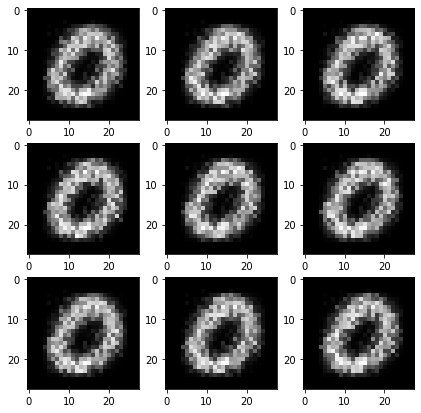

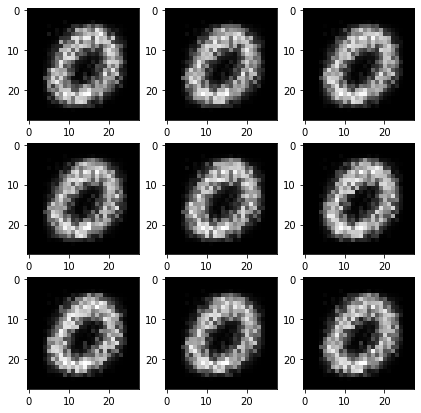

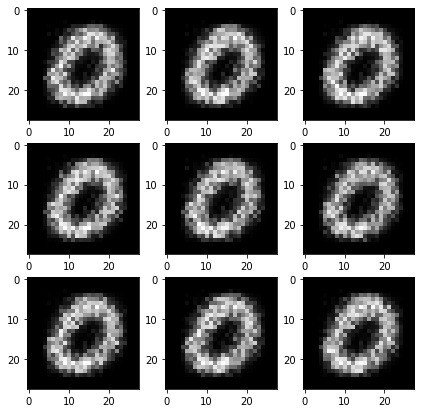

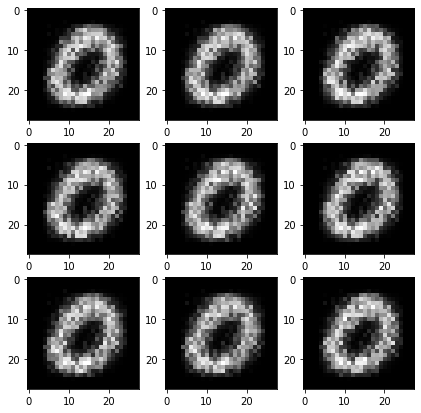

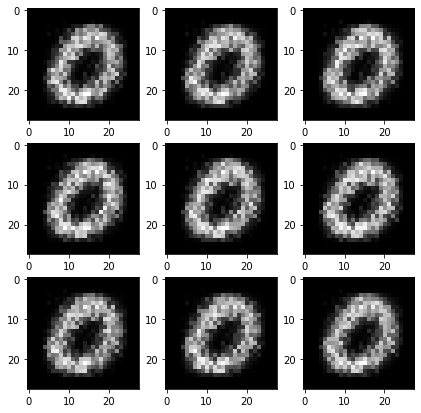

In [12]:
#Generating Unlimited samples
for i in range(5):
    show_generator_results(generator_network)